In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
df=pd.DataFrame(train.isna().sum()[train.isna().sum()!=0].sort_values(ascending=False))
df.columns=["#missing"]
df["percent missing"]=train.isna().sum()/len(train)
df

,#missing,percent missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [7]:
train.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis=1,inplace=True)

In [8]:
train['MSSubClass'].value_counts(dropna=False).sort_values()

40       4
180     10
45      12
75      16
85      20
190     30
90      52
80      58
70      60
160     63
30      69
120     87
50     144
60     299
20     536
Name: MSSubClass, dtype: int64

In [9]:
train['MSZoning'].value_counts(dropna=False).sort_values()

C (all)      10
RH           16
FV           65
RM          218
RL         1151
Name: MSZoning, dtype: int64

In [10]:
train['Street'].value_counts(dropna=False).sort_values()

Grvl       6
Pave    1454
Name: Street, dtype: int64

In [11]:
train.drop('Street',axis=1,inplace=True)

In [12]:
train['LotShape'].value_counts(dropna=False).sort_values()

IR3     10
IR2     41
IR1    484
Reg    925
Name: LotShape, dtype: int64

In [13]:
train['LotShape'].replace({'IR1':'IR','IR2':'IR','IR3':'IR'},inplace=True)

In [14]:
train['LotShape'].value_counts(dropna=False).sort_values()

IR     535
Reg    925
Name: LotShape, dtype: int64

In [15]:
train['LandContour'].value_counts(dropna=False).sort_values()

Low      36
HLS      50
Bnk      63
Lvl    1311
Name: LandContour, dtype: int64

In [16]:
train['LandSlope'].value_counts(dropna=False).sort_values()

Sev      13
Mod      65
Gtl    1382
Name: LandSlope, dtype: int64

In [17]:
train.drop('LandContour',axis=1,inplace=True)
test.drop('LandContour',axis=1,inplace=True)
train.drop('LandSlope',axis=1,inplace=True)
test.drop('LandSlope',axis=1,inplace=True)

In [18]:
train['Utilities'].value_counts(dropna=False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [19]:
train.drop('Utilities',axis=1,inplace=True)
test.drop('Utilities',axis=1,inplace=True)

In [20]:
train['LotConfig'].value_counts(dropna=False).sort_values()

FR3           4
FR2          47
CulDSac      94
Corner      263
Inside     1052
Name: LotConfig, dtype: int64

In [21]:
train.drop('LotConfig',axis=1,inplace=True)
test.drop('LotConfig',axis=1,inplace=True)

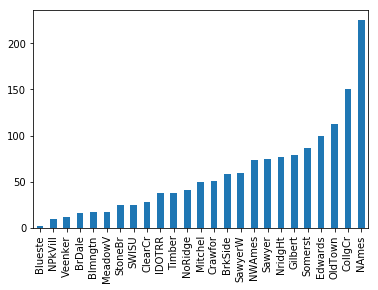

In [22]:
train['Neighborhood'].value_counts(dropna=False).sort_values().plot(kind='bar')

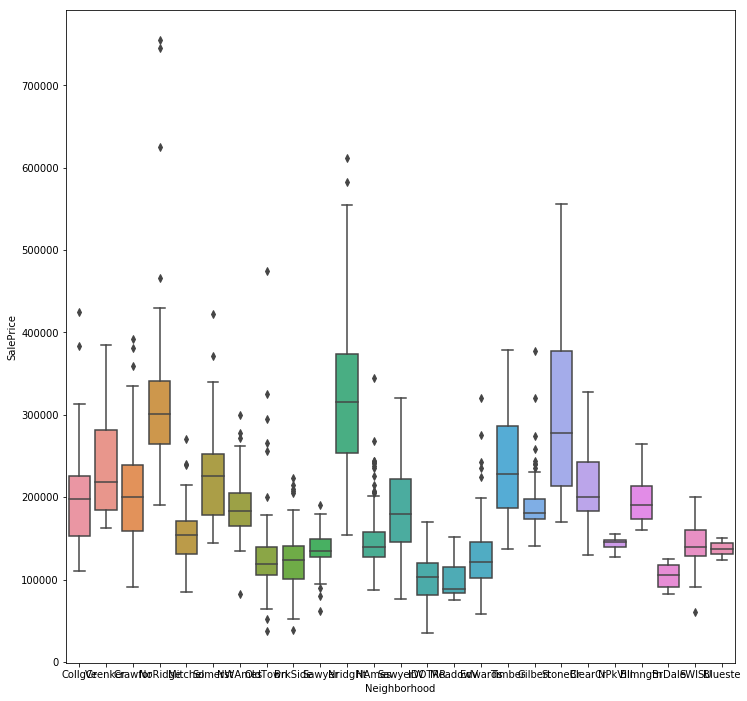

In [23]:
plt.figure(figsize=(12,12))
sns.boxplot(x=train['Neighborhood'],y=train['SalePrice'])

In [24]:
train['Condition1'].value_counts(dropna=False).sort_values()

RRNe         2
RRNn         5
PosA         8
RRAe        11
PosN        19
RRAn        26
Artery      48
Feedr       81
Norm      1260
Name: Condition1, dtype: int64

In [25]:
train['Condition2'].value_counts(dropna=False).sort_values()

RRAe         1
RRAn         1
PosA         1
Artery       2
PosN         2
RRNn         2
Feedr        6
Norm      1445
Name: Condition2, dtype: int64

In [26]:
train.drop('Condition2',axis=1,inplace=True)
test.drop('Condition2',axis=1,inplace=True)

In [27]:
train['BldgType'].value_counts(dropna=False).sort_values()

2fmCon      31
Twnhs       43
Duplex      52
TwnhsE     114
1Fam      1220
Name: BldgType, dtype: int64

In [28]:
train['HouseStyle'].value_counts(dropna=False)

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [29]:
train['OverallQual'].value_counts(dropna=False).sort_values()

1       2
2       3
10     18
3      20
9      43
4     116
8     168
7     319
6     374
5     397
Name: OverallQual, dtype: int64

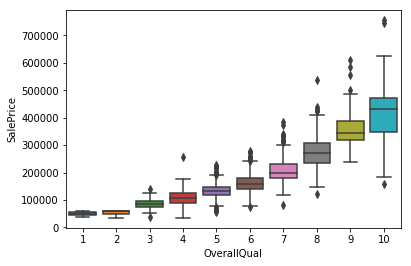

In [30]:
sns.boxplot(x=train['OverallQual'],y=train['SalePrice'])

In [31]:
train.drop('OverallCond',axis=1,inplace=True)
test.drop('OverallCond',axis=1,inplace=True)

In [32]:
train.drop('YearRemodAdd',axis=1,inplace=True)
test.drop('YearRemodAdd',axis=1,inplace=True)

In [33]:
train['RoofStyle'].value_counts(dropna=False).sort_values()

Shed          2
Mansard       7
Gambrel      11
Flat         13
Hip         286
Gable      1141
Name: RoofStyle, dtype: int64

In [34]:
train['RoofMatl'].value_counts(dropna=False).sort_values()

Metal         1
ClyTile       1
Membran       1
Roll          1
WdShake       5
WdShngl       6
Tar&Grv      11
CompShg    1434
Name: RoofMatl, dtype: int64

In [35]:
train.drop('RoofMatl',axis=1,inplace=True)
test.drop('RoofMatl',axis=1,inplace=True)

In [36]:
train['Exterior1st'].value_counts(dropna=False).sort_values()

ImStucc      1
CBlock       1
AsphShn      1
Stone        2
BrkComm      2
AsbShng     20
Stucco      25
WdShing     26
BrkFace     50
CemntBd     61
Plywood    108
Wd Sdng    206
MetalSd    220
HdBoard    222
VinylSd    515
Name: Exterior1st, dtype: int64

In [37]:
train.drop(['Exterior2nd','MasVnrType','MasVnrArea'],axis=1,inplace=True)

In [38]:
train['Age']=train['YrSold']-train['YearBuilt']

In [39]:
train.drop(['YrSold','YearBuilt'],axis=1,inplace=True)

In [40]:
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,0,12,WD,Normal,250000,8


In [41]:
train["ExterQual"].value_counts(dropna=False)

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

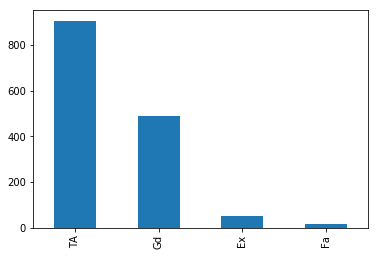

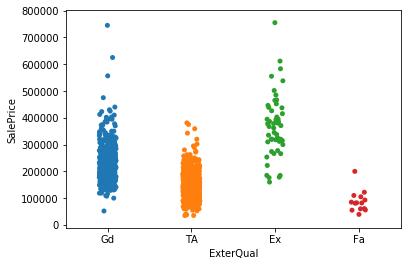

In [42]:
train["ExterQual"].value_counts().plot(kind="bar")
plt.show()
sns.stripplot(x="ExterQual",y="SalePrice",data=train,jitter=True)
plt.show()
#sns.swarmplot(x="ExterQual",y="SalePrice",data=train)
#plt.show()

In [43]:
train.drop(["ExterQual","ExterCond"],axis=1,inplace =True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,0,12,WD,Normal,250000,8


In [44]:
train["Foundation"].value_counts(dropna=False)

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

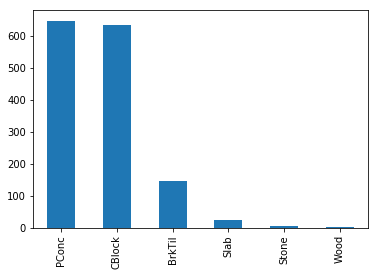

In [45]:
train["Foundation"].value_counts().plot(kind="bar")
plt.show()

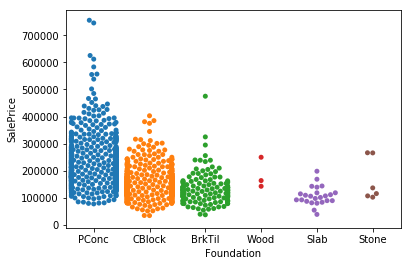

In [46]:
sns.swarmplot(x="Foundation",y="SalePrice",data=train)
plt.show()

In [47]:
train.drop(['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,0,12,WD,Normal,250000,8


In [48]:
train["Heating"].value_counts(dropna=False)

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [49]:
train.drop(['Heating','HeatingQC'],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,0,12,WD,Normal,250000,8


In [50]:
train["CentralAir"].value_counts(dropna=False)

Y    1365
N      95
Name: CentralAir, dtype: int64

In [51]:
train["Electrical"].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

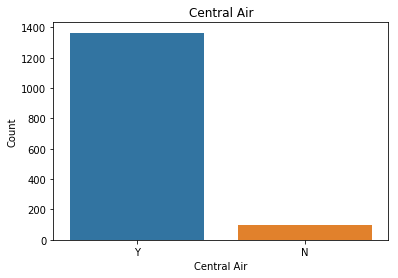

In [52]:
sns.countplot(x=train["CentralAir"])
plt.title("Central Air")
plt.xlabel("Central Air")
plt.ylabel("Count")
plt.show()

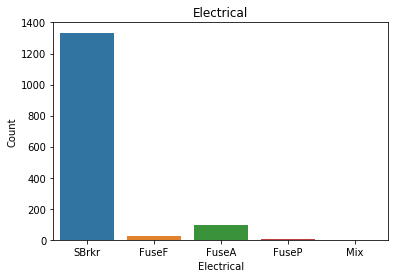

In [53]:
sns.countplot(x=train["Electrical"])
plt.title("Electrical")
plt.xlabel("Electrical")
plt.ylabel("Count")
plt.show()

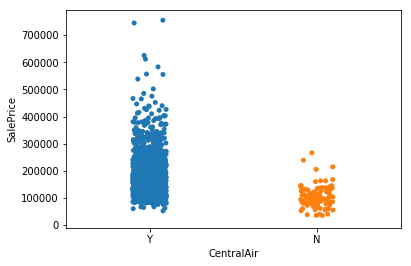

In [54]:
sns.stripplot(x="CentralAir",y="SalePrice",data=train,jitter=True)
plt.show()

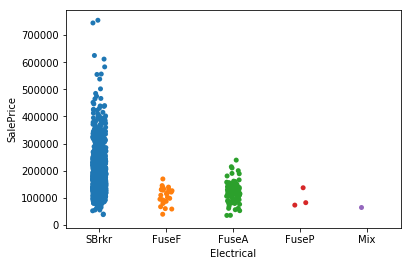

In [55]:
sns.stripplot(x="Electrical",y="SalePrice",data=train,jitter=True)
plt.show()

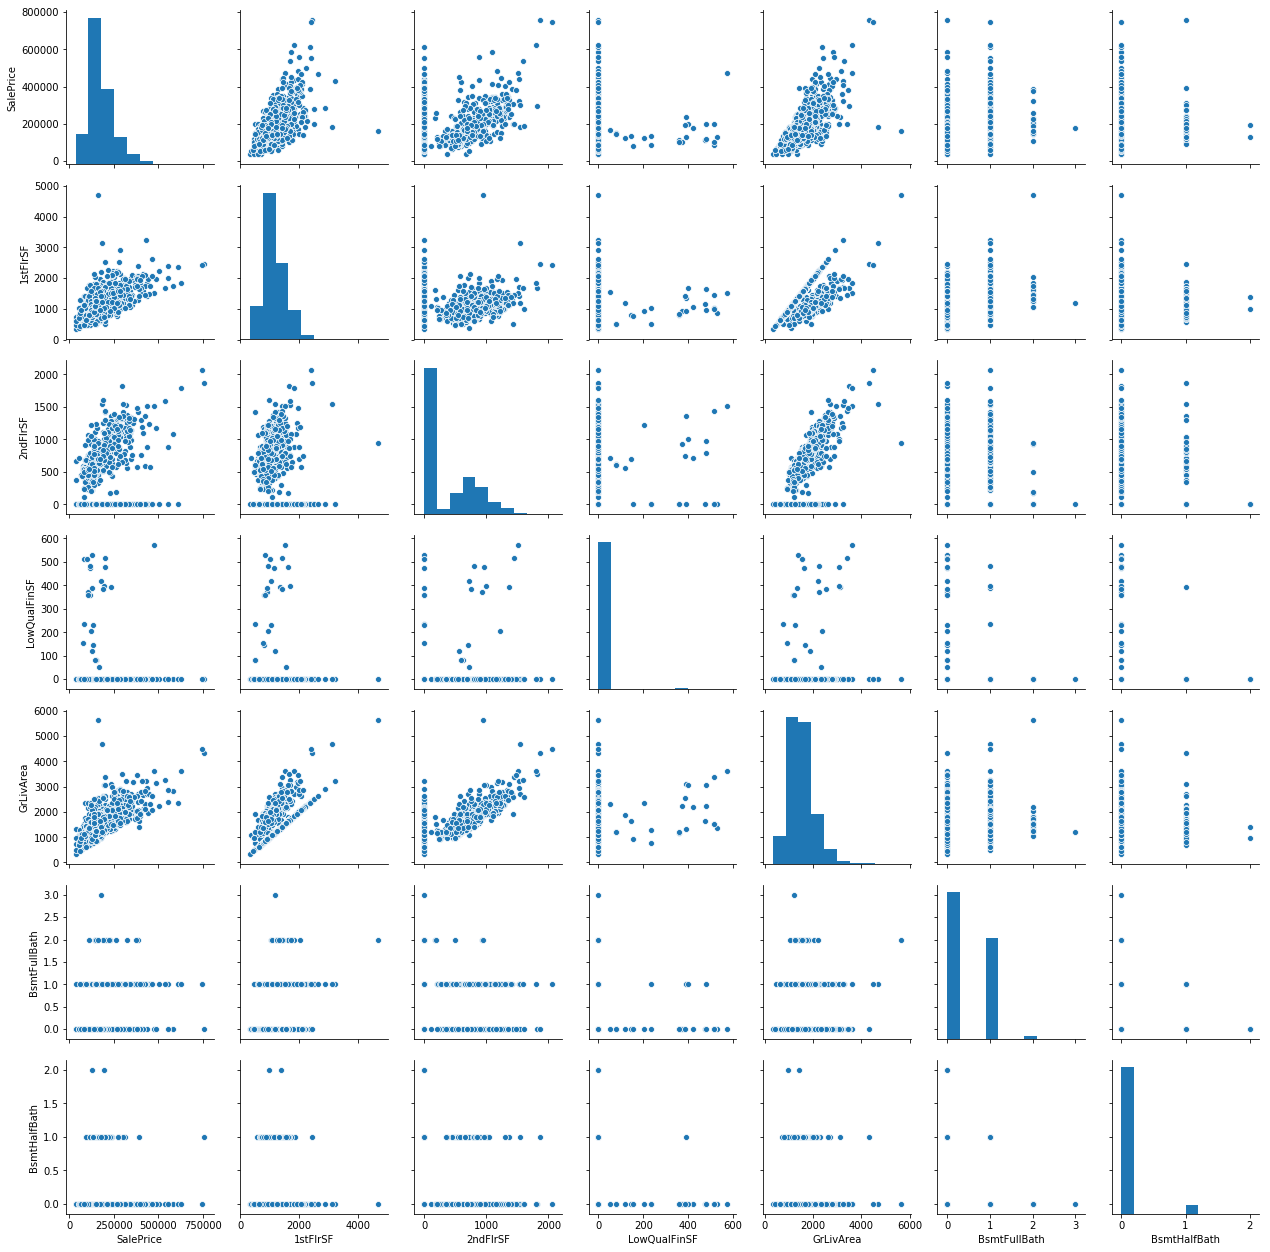

In [56]:
sns.pairplot(train,vars=['SalePrice','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath'])  

In [57]:
train.drop(["LowQualFinSF"],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,2,WD,Normal,208500,5
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,0,5,WD,Normal,181500,31
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,0,9,WD,Normal,223500,7
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,0,12,WD,Normal,250000,8


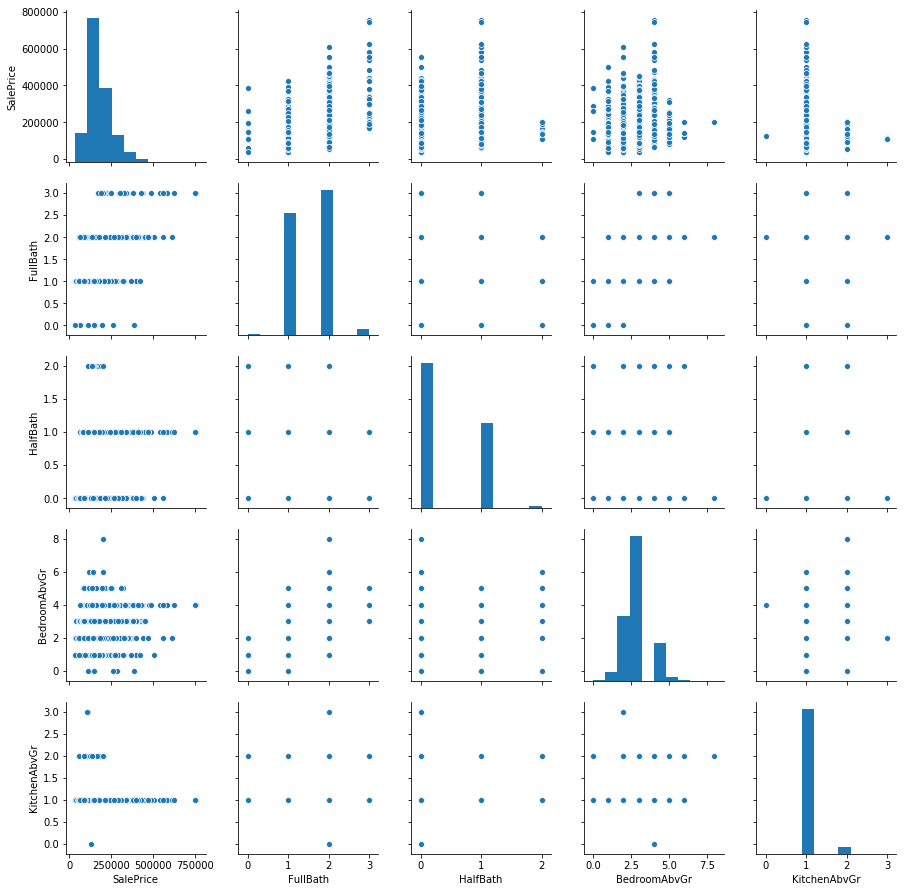

In [58]:
sns.pairplot(train,vars=['SalePrice','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr'])
plt.show()

In [59]:
train["No. of bathrooms"]=train["FullBath"]+train["HalfBath"]+train["BsmtFullBath"]+train["BsmtHalfBath"]
train.drop(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,No. of bathrooms
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,2,WD,Normal,208500,5,4
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,5,WD,Normal,181500,31,3
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,9,WD,Normal,223500,7,4
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,2,WD,Abnorml,140000,91,2
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,12,WD,Normal,250000,8,4


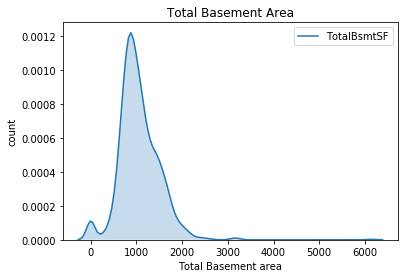

In [60]:
sns.kdeplot(train["TotalBsmtSF"],shade=True)
plt.xlabel("Total Basement area")
plt.ylabel("count")
plt.title("Total Basement Area")
plt.show()

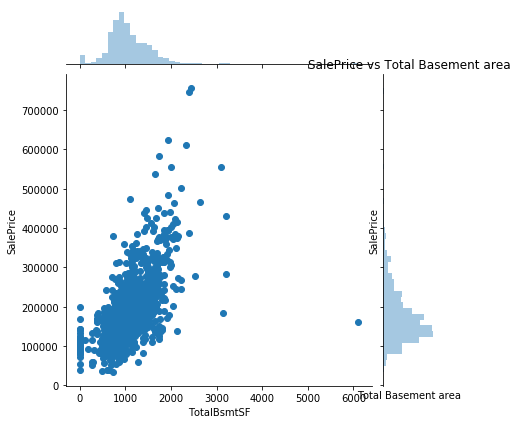

In [61]:
sns.jointplot(x="TotalBsmtSF",y="SalePrice",data=train)
plt.xlabel("Total Basement area")
plt.ylabel("SalePrice")
plt.title("SalePrice vs Total Basement area")
plt.show()

In [62]:
train.drop(["BedroomAbvGr","KitchenAbvGr","KitchenQual","Functional","Fireplaces"],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,No. of bathrooms
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,2,WD,Normal,208500,5,4
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,5,WD,Normal,181500,31,3
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,9,WD,Normal,223500,7,4
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,2,WD,Abnorml,140000,91,2
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,12,WD,Normal,250000,8,4


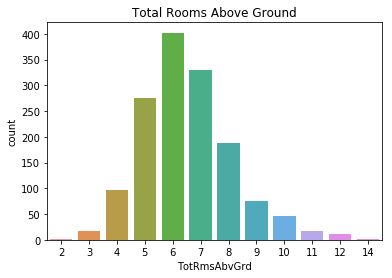

In [63]:
sns.countplot(train["TotRmsAbvGrd"])
plt.title("Total Rooms Above Ground")
plt.show()

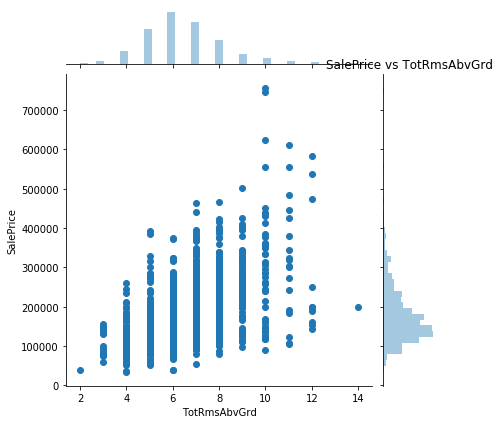

In [64]:
sns.jointplot(x=train["TotRmsAbvGrd"],y=train["SalePrice"],data=train)
plt.title("SalePrice vs TotRmsAbvGrd")
plt.show()

In [65]:
train.drop(["GarageYrBlt","GarageFinish","GarageArea","GarageQual","GarageCond","PavedDrive"],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,No. of bathrooms
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,2,WD,Normal,208500,5,4
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,0,0,0,0,5,WD,Normal,181500,31,3
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,9,WD,Normal,223500,7,4
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,0,0,0,0,2,WD,Abnorml,140000,91,2
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,0,0,0,0,12,WD,Normal,250000,8,4


In [66]:
train.drop(["PoolArea","MiscVal","MoSold","SaleCondition"],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleType,SalePrice,Age,No. of bathrooms
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,2,0,61,0,0,0,WD,208500,5,4
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,2,298,0,0,0,0,WD,181500,31,3
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,2,0,42,0,0,0,WD,223500,7,4
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,3,0,35,272,0,0,WD,140000,91,2
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,3,192,84,0,0,0,WD,250000,8,4


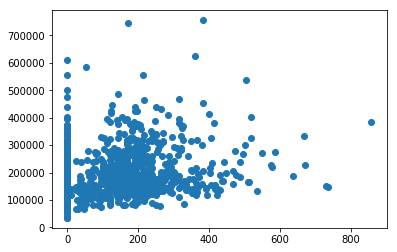

In [67]:
plt.scatter(x=train["WoodDeckSF"],y=train["SalePrice"])
plt.show()

In [68]:
train["PorchArea"]=train["OpenPorchSF"]+train["EnclosedPorch"]+train["3SsnPorch"]+train["ScreenPorch"]
train.drop(["OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"],axis=1,inplace=True)
train.head()

,MSSubClass,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,...,GrLivArea,TotRmsAbvGrd,GarageType,GarageCars,WoodDeckSF,SaleType,SalePrice,Age,No. of bathrooms,PorchArea
0,60,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,...,1710,8,Attchd,2,0,WD,208500,5,4,61
1,20,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,...,1262,6,Attchd,2,298,WD,181500,31,3,0
2,60,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,...,1786,6,Attchd,2,0,WD,223500,7,4,42
3,70,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,...,1717,7,Detchd,3,0,WD,140000,91,2,307
4,60,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,...,2198,9,Attchd,3,192,WD,250000,8,4,84


In [69]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'Exterior1st', 'Foundation', 'TotalBsmtSF', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageType',
       'GarageCars', 'WoodDeckSF', 'SaleType', 'SalePrice', 'Age',
       'No. of bathrooms', 'PorchArea'],
      dtype='object')

In [70]:
train.drop(["MSSubClass"],axis=1,inplace=True)
train.head()

,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,...,GrLivArea,TotRmsAbvGrd,GarageType,GarageCars,WoodDeckSF,SaleType,SalePrice,Age,No. of bathrooms,PorchArea
0,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,...,1710,8,Attchd,2,0,WD,208500,5,4,61
1,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,...,1262,6,Attchd,2,298,WD,181500,31,3,0
2,RL,11250,IR,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,...,1786,6,Attchd,2,0,WD,223500,7,4,42
3,RL,9550,IR,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,...,1717,7,Detchd,3,0,WD,140000,91,2,307
4,RL,14260,IR,NoRidge,Norm,1Fam,2Story,8,Gable,VinylSd,...,2198,9,Attchd,3,192,WD,250000,8,4,84


In [71]:
train.drop(["LotShape"],axis=1,inplace=True)
train.head()

,MSZoning,LotArea,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Foundation,...,GrLivArea,TotRmsAbvGrd,GarageType,GarageCars,WoodDeckSF,SaleType,SalePrice,Age,No. of bathrooms,PorchArea
0,RL,8450,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,...,1710,8,Attchd,2,0,WD,208500,5,4,61
1,RL,9600,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,CBlock,...,1262,6,Attchd,2,298,WD,181500,31,3,0
2,RL,11250,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,...,1786,6,Attchd,2,0,WD,223500,7,4,42
3,RL,9550,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,BrkTil,...,1717,7,Detchd,3,0,WD,140000,91,2,307
4,RL,14260,NoRidge,Norm,1Fam,2Story,8,Gable,VinylSd,PConc,...,2198,9,Attchd,3,192,WD,250000,8,4,84


In [72]:
train.drop(["CentralAir"],axis=1,inplace=True)

In [73]:
train.head()

,MSZoning,LotArea,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Foundation,...,GrLivArea,TotRmsAbvGrd,GarageType,GarageCars,WoodDeckSF,SaleType,SalePrice,Age,No. of bathrooms,PorchArea
0,RL,8450,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,...,1710,8,Attchd,2,0,WD,208500,5,4,61
1,RL,9600,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,CBlock,...,1262,6,Attchd,2,298,WD,181500,31,3,0
2,RL,11250,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,...,1786,6,Attchd,2,0,WD,223500,7,4,42
3,RL,9550,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,BrkTil,...,1717,7,Detchd,3,0,WD,140000,91,2,307
4,RL,14260,NoRidge,Norm,1Fam,2Story,8,Gable,VinylSd,PConc,...,2198,9,Attchd,3,192,WD,250000,8,4,84


In [74]:
train["Sale Price"]=train["SalePrice"]
train.drop(["SalePrice"],axis=1,inplace=True)
train.head()

,MSZoning,LotArea,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Foundation,...,GrLivArea,TotRmsAbvGrd,GarageType,GarageCars,WoodDeckSF,SaleType,Age,No. of bathrooms,PorchArea,Sale Price
0,RL,8450,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,...,1710,8,Attchd,2,0,WD,5,4,61,208500
1,RL,9600,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,CBlock,...,1262,6,Attchd,2,298,WD,31,3,0,181500
2,RL,11250,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,...,1786,6,Attchd,2,0,WD,7,4,42,223500
3,RL,9550,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,BrkTil,...,1717,7,Detchd,3,0,WD,91,2,307,140000
4,RL,14260,NoRidge,Norm,1Fam,2Story,8,Gable,VinylSd,PConc,...,2198,9,Attchd,3,192,WD,8,4,84,250000


In [75]:
train.columns


Index(['MSZoning', 'LotArea', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'RoofStyle', 'Exterior1st', 'Foundation',
       'TotalBsmtSF', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageType', 'GarageCars', 'WoodDeckSF', 'SaleType',
       'Age', 'No. of bathrooms', 'PorchArea', 'Sale Price'],
      dtype='object')

In [76]:
train["MSZoning"].value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [77]:
from numpy import math
def MSzoning(string):
    if string=="RL":
        return 1
    elif string=="RM":
        return 2
    elif string =="FV":
        return 3
    elif string=="RH":
        return 4
    elif string=="C":
        return 5
train["MSZone"]=train["MSZoning"].apply(MSzoning)
train.head()
train.drop(["MSZoning"],axis=1,inplace=True)

In [78]:
train["Neighborhood"].value_counts(dropna=False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [79]:
def neigh(string):
    if string=="NAmes":
        return 1
    elif string=="CollgCr":
        return 2
    elif string =="OldTown":
        return 3
    elif string=="Edwards":
        return 4
    elif string=="Somerst":
        return 5
    elif string=="Gilbert":
        return 6
    elif string=="NridgHt":
        return 7
    elif string=="Sawyer":
        return 8
    elif string=="NWAmes":
        return 9
    elif string=="SawyerW":
        return 10
    elif string=="BrkSide":
        return 11
    elif string=="Crawfor":
        return 12
    elif string=="Mitchel":
        return 13
    elif string=="NoRidge":
        return 14
    elif string=="Timber":
        return 15
    elif string=="IDOTRR":
        return 16
    elif string=="ClearCr":
        return 17
    elif string=="SWISU":
        return 18
    elif string=="StoneBr":
        return 19
    elif string=="MeadowV":
        return 20
    elif string=="Blmngtn":
        return 21
    elif string=="BrDale":
        return 22
    elif string=="Veenker":
        return 23
    elif string=="NPkVill":
        return 24
    elif string=="Blueste":
        return 25
    
train["Neighbor"]=train["Neighborhood"].apply(neigh)
train.drop(["Neighborhood"],axis=1,inplace=True)
train.head()

,LotArea,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Foundation,TotalBsmtSF,Electrical,...,GarageType,GarageCars,WoodDeckSF,SaleType,Age,No. of bathrooms,PorchArea,Sale Price,MSZone,Neighbor
0,8450,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,856,SBrkr,...,Attchd,2,0,WD,5,4,61,208500,1.0,2
1,9600,Feedr,1Fam,1Story,6,Gable,MetalSd,CBlock,1262,SBrkr,...,Attchd,2,298,WD,31,3,0,181500,1.0,23
2,11250,Norm,1Fam,2Story,7,Gable,VinylSd,PConc,920,SBrkr,...,Attchd,2,0,WD,7,4,42,223500,1.0,2
3,9550,Norm,1Fam,2Story,7,Gable,Wd Sdng,BrkTil,756,SBrkr,...,Detchd,3,0,WD,91,2,307,140000,1.0,12
4,14260,Norm,1Fam,2Story,8,Gable,VinylSd,PConc,1145,SBrkr,...,Attchd,3,192,WD,8,4,84,250000,1.0,14


In [80]:
train["Condition1"].value_counts(dropna=False)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [81]:
def n(string):
    if string=="Norm":
        return 1
    elif string=="Feedr":
        return 2
    elif string =="Artery":
        return 3
    elif string=="RRAn":
        return 4
    elif string=="PosN":
        return 5
    elif string=="RRAe":
        return 6
    elif string=="PosA":
        return 7
    elif string=="RRNn":
        return 8
    elif string=="RRNe":
        return 9
train["Condition"]=train["Condition1"].apply(n)
train.drop(["Condition1"],axis=1,inplace=True)
train.head()

,LotArea,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Foundation,TotalBsmtSF,Electrical,1stFlrSF,...,GarageCars,WoodDeckSF,SaleType,Age,No. of bathrooms,PorchArea,Sale Price,MSZone,Neighbor,Condition
0,8450,1Fam,2Story,7,Gable,VinylSd,PConc,856,SBrkr,856,...,2,0,WD,5,4,61,208500,1.0,2,1
1,9600,1Fam,1Story,6,Gable,MetalSd,CBlock,1262,SBrkr,1262,...,2,298,WD,31,3,0,181500,1.0,23,2
2,11250,1Fam,2Story,7,Gable,VinylSd,PConc,920,SBrkr,920,...,2,0,WD,7,4,42,223500,1.0,2,1
3,9550,1Fam,2Story,7,Gable,Wd Sdng,BrkTil,756,SBrkr,961,...,3,0,WD,91,2,307,140000,1.0,12,1
4,14260,1Fam,2Story,8,Gable,VinylSd,PConc,1145,SBrkr,1145,...,3,192,WD,8,4,84,250000,1.0,14,1


In [82]:
train["BldgType"].value_counts(dropna=False)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [83]:
def m(string):
    if string=="1Fam":
        return 1
    elif string=="TwnhsE":
        return 2
    elif string =="Duplex":
        return 3
    elif string=="Twnhs":
        return 4
    elif string=="2fmCon":
        return 5
train["BuildingType"]=train["BldgType"].apply(m)
train.drop(["BldgType"],axis=1,inplace=True)
train.head()

,LotArea,HouseStyle,OverallQual,RoofStyle,Exterior1st,Foundation,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,...,WoodDeckSF,SaleType,Age,No. of bathrooms,PorchArea,Sale Price,MSZone,Neighbor,Condition,BuildingType
0,8450,2Story,7,Gable,VinylSd,PConc,856,SBrkr,856,854,...,0,WD,5,4,61,208500,1.0,2,1,1
1,9600,1Story,6,Gable,MetalSd,CBlock,1262,SBrkr,1262,0,...,298,WD,31,3,0,181500,1.0,23,2,1
2,11250,2Story,7,Gable,VinylSd,PConc,920,SBrkr,920,866,...,0,WD,7,4,42,223500,1.0,2,1,1
3,9550,2Story,7,Gable,Wd Sdng,BrkTil,756,SBrkr,961,756,...,0,WD,91,2,307,140000,1.0,12,1,1
4,14260,2Story,8,Gable,VinylSd,PConc,1145,SBrkr,1145,1053,...,192,WD,8,4,84,250000,1.0,14,1,1


In [84]:
train["HouseStyle"].value_counts(dropna=False)

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [85]:
def x(string):
    if isinstance(string,float) and math.isnan(string):
        return float(0)
    elif string=="1Story":
        return 1
    elif string=="2Story":
        return 2
    elif string =="1.5Fin" or string=="1.5Unf":
        return 1.5
    elif string=="SLvL":
        return 3
    elif string=="SFoyer":
        return 4
    else:
        return 2.5
train["HouseStyle(Story)"]=train["HouseStyle"].apply(x)
train.drop(["HouseStyle"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,RoofStyle,Exterior1st,Foundation,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType,Age,No. of bathrooms,PorchArea,Sale Price,MSZone,Neighbor,Condition,BuildingType,HouseStyle(Story)
0,8450,7,Gable,VinylSd,PConc,856,SBrkr,856,854,1710,...,WD,5,4,61,208500,1.0,2,1,1,2.0
1,9600,6,Gable,MetalSd,CBlock,1262,SBrkr,1262,0,1262,...,WD,31,3,0,181500,1.0,23,2,1,1.0
2,11250,7,Gable,VinylSd,PConc,920,SBrkr,920,866,1786,...,WD,7,4,42,223500,1.0,2,1,1,2.0
3,9550,7,Gable,Wd Sdng,BrkTil,756,SBrkr,961,756,1717,...,WD,91,2,307,140000,1.0,12,1,1,2.0
4,14260,8,Gable,VinylSd,PConc,1145,SBrkr,1145,1053,2198,...,WD,8,4,84,250000,1.0,14,1,1,2.0


In [86]:
train["RoofStyle"].value_counts(dropna=False)

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [87]:
def y(string):
    if string=="Gable":
        return 1
    elif string=="Hip":
        return 2
    elif string =="Flat":
        return 3
    elif string=="Gambrel":
        return 4
    elif string=="Mansard":
        return 5
    elif string=="Shed":
        return 6
train["Roof"]=train["RoofStyle"].apply(y)
train.drop(["RoofStyle"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,Exterior1st,Foundation,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,...,Age,No. of bathrooms,PorchArea,Sale Price,MSZone,Neighbor,Condition,BuildingType,HouseStyle(Story),Roof
0,8450,7,VinylSd,PConc,856,SBrkr,856,854,1710,8,...,5,4,61,208500,1.0,2,1,1,2.0,1
1,9600,6,MetalSd,CBlock,1262,SBrkr,1262,0,1262,6,...,31,3,0,181500,1.0,23,2,1,1.0,1
2,11250,7,VinylSd,PConc,920,SBrkr,920,866,1786,6,...,7,4,42,223500,1.0,2,1,1,2.0,1
3,9550,7,Wd Sdng,BrkTil,756,SBrkr,961,756,1717,7,...,91,2,307,140000,1.0,12,1,1,2.0,1
4,14260,8,VinylSd,PConc,1145,SBrkr,1145,1053,2198,9,...,8,4,84,250000,1.0,14,1,1,2.0,1


In [88]:
train["Exterior1st"].value_counts(dropna=False)

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [89]:
def o(string):
    if isinstance(string,float) and math.isnan(string):
        return float(0)
    if string=="VinylSd" or "Vinyl Siding":
        return 1
    elif string=="HdBoard" or "Hard Board":
        return 2
    elif string =="MetalSd" or "Metal Siding":
        return 3
    elif string=="Wd Sdng" or "Wood Siding":
        return 4
    elif string=="Plywood":
        return 5
    elif string=="CmentBd" or "Cement Board":
        return 6
    elif string=="BrkFace" or "Brick Face":
        return 7
    elif string=="WdShing" or "Wood Shingles":
        return 8
    elif string=="Stucco":
        return 9
    elif string=="AsbShng" or "Asbestos":
        return 10
train["Exterior"]=train["Exterior1st"].apply(o)
train.drop(["Exterior1st"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,Foundation,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageType,...,No. of bathrooms,PorchArea,Sale Price,MSZone,Neighbor,Condition,BuildingType,HouseStyle(Story),Roof,Exterior
0,8450,7,PConc,856,SBrkr,856,854,1710,8,Attchd,...,4,61,208500,1.0,2,1,1,2.0,1,1
1,9600,6,CBlock,1262,SBrkr,1262,0,1262,6,Attchd,...,3,0,181500,1.0,23,2,1,1.0,1,1
2,11250,7,PConc,920,SBrkr,920,866,1786,6,Attchd,...,4,42,223500,1.0,2,1,1,2.0,1,1
3,9550,7,BrkTil,756,SBrkr,961,756,1717,7,Detchd,...,2,307,140000,1.0,12,1,1,2.0,1,1
4,14260,8,PConc,1145,SBrkr,1145,1053,2198,9,Attchd,...,4,84,250000,1.0,14,1,1,2.0,1,1


In [90]:
train["Foundation"].value_counts(dropna=False)

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [91]:
def h(string):
    if string=="PConc" or "Poured Concrete":
        return 1
    elif string=="CBlock" or "Cinder Block":
        return 2
    elif string =="BrkTil" or "Brick And Tile":
        return 3
    elif string=="Slab":
        return 4
    elif string=="Stone":
        return 5
    elif string=="Wood":
        return 6
train["FoundationStructure"]=train["Foundation"].apply(h)
train.drop(["Foundation"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageType,GarageCars,...,PorchArea,Sale Price,MSZone,Neighbor,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure
0,8450,7,856,SBrkr,856,854,1710,8,Attchd,2,...,61,208500,1.0,2,1,1,2.0,1,1,1
1,9600,6,1262,SBrkr,1262,0,1262,6,Attchd,2,...,0,181500,1.0,23,2,1,1.0,1,1,1
2,11250,7,920,SBrkr,920,866,1786,6,Attchd,2,...,42,223500,1.0,2,1,1,2.0,1,1,1
3,9550,7,756,SBrkr,961,756,1717,7,Detchd,3,...,307,140000,1.0,12,1,1,2.0,1,1,1
4,14260,8,1145,SBrkr,1145,1053,2198,9,Attchd,3,...,84,250000,1.0,14,1,1,2.0,1,1,1


In [92]:
train["Electrical"].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [93]:
def p(string):
    if isinstance(string,float) and math.isnan(string):
        return float(0)
    elif string=="SBrkr" or "Standard Circuit Breakers & Romex":
        return 1
    elif string=="FuseA" or "Fuse Box over 60 AMP and all Romex wiring":
        return 2
    elif string=="FuseF" or "60 AMP Fuse Box and mostly Romex wiring":
        return 3
    elif string=="FuseP" or "60 AMP Fuse Box and mostly knob and tube wiring":
        return 4
    elif string=="Mix" or "Mixed":
        return 5
train["Electricity"]=train["Electrical"].apply(p)
train.drop(["Electrical"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageType,GarageCars,WoodDeckSF,...,Sale Price,MSZone,Neighbor,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure,Electricity
0,8450,7,856,856,854,1710,8,Attchd,2,0,...,208500,1.0,2,1,1,2.0,1,1,1,1.0
1,9600,6,1262,1262,0,1262,6,Attchd,2,298,...,181500,1.0,23,2,1,1.0,1,1,1,1.0
2,11250,7,920,920,866,1786,6,Attchd,2,0,...,223500,1.0,2,1,1,2.0,1,1,1,1.0
3,9550,7,756,961,756,1717,7,Detchd,3,0,...,140000,1.0,12,1,1,2.0,1,1,1,1.0
4,14260,8,1145,1145,1053,2198,9,Attchd,3,192,...,250000,1.0,14,1,1,2.0,1,1,1,1.0


In [94]:
train["GarageType"].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [95]:
def a(string):
    if isinstance(string,float) and math.isnan(string):
        return float(0)
    elif string=="Attchd":
        return 1
    elif string=="BuiltIn":
        return 2
    elif string=="Basment":
        return 3
    elif string=="CarPort":
        return 4
    elif string=="2Types":
        return 5
train["Garage"]=train["GarageType"].apply(a)
train.drop(["GarageType"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,WoodDeckSF,SaleType,...,MSZone,Neighbor,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure,Electricity,Garage
0,8450,7,856,856,854,1710,8,2,0,WD,...,1.0,2,1,1,2.0,1,1,1,1.0,1.0
1,9600,6,1262,1262,0,1262,6,2,298,WD,...,1.0,23,2,1,1.0,1,1,1,1.0,1.0
2,11250,7,920,920,866,1786,6,2,0,WD,...,1.0,2,1,1,2.0,1,1,1,1.0,1.0
3,9550,7,756,961,756,1717,7,3,0,WD,...,1.0,12,1,1,2.0,1,1,1,1.0,NaN
4,14260,8,1145,1145,1053,2198,9,3,192,WD,...,1.0,14,1,1,2.0,1,1,1,1.0,1.0


In [96]:
train["SaleType"].value_counts(dropna=False)

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [97]:
def b(string):
    if string=="WD":
        return 1
    elif string=="New":
        return 2
    elif string=="COD":
        return 3
    elif string=="ConLD":
        return 4
    elif string=="ConLI":
        return 5
    elif string=="ConLw":
        return 6
    elif string=="CWD":
        return 7
    elif string=="Oth":
        return 8
    elif string=="Con":
        return 9
train["TypeOfSale"]=train["SaleType"].apply(b)
train.drop(["SaleType"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,WoodDeckSF,Age,...,Neighbor,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure,Electricity,Garage,TypeOfSale
0,8450,7,856,856,854,1710,8,2,0,5,...,2,1,1,2.0,1,1,1,1.0,1.0,1
1,9600,6,1262,1262,0,1262,6,2,298,31,...,23,2,1,1.0,1,1,1,1.0,1.0,1
2,11250,7,920,920,866,1786,6,2,0,7,...,2,1,1,2.0,1,1,1,1.0,1.0,1
3,9550,7,756,961,756,1717,7,3,0,91,...,12,1,1,2.0,1,1,1,1.0,NaN,1
4,14260,8,1145,1145,1053,2198,9,3,192,8,...,14,1,1,2.0,1,1,1,1.0,1.0,1


In [98]:
train["SalePrice"]=train["Sale Price"]
train.drop(["Sale Price"],axis=1,inplace=True)
train.head()

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,WoodDeckSF,Age,...,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure,Electricity,Garage,TypeOfSale,SalePrice
0,8450,7,856,856,854,1710,8,2,0,5,...,1,1,2.0,1,1,1,1.0,1.0,1,208500
1,9600,6,1262,1262,0,1262,6,2,298,31,...,2,1,1.0,1,1,1,1.0,1.0,1,181500
2,11250,7,920,920,866,1786,6,2,0,7,...,1,1,2.0,1,1,1,1.0,1.0,1,223500
3,9550,7,756,961,756,1717,7,3,0,91,...,1,1,2.0,1,1,1,1.0,NaN,1,140000
4,14260,8,1145,1145,1053,2198,9,3,192,8,...,1,1,2.0,1,1,1,1.0,1.0,1,250000


In [99]:
train.fillna(0,inplace=True)
train

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,WoodDeckSF,Age,...,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure,Electricity,Garage,TypeOfSale,SalePrice
0,8450,7,856,856,854,1710,8,2,0,5,...,1,1,2.0,1,1,1,1.0,1.0,1,208500
1,9600,6,1262,1262,0,1262,6,2,298,31,...,2,1,1.0,1,1,1,1.0,1.0,1,181500
2,11250,7,920,920,866,1786,6,2,0,7,...,1,1,2.0,1,1,1,1.0,1.0,1,223500
3,9550,7,756,961,756,1717,7,3,0,91,...,1,1,2.0,1,1,1,1.0,0.0,1,140000
4,14260,8,1145,1145,1053,2198,9,3,192,8,...,1,1,2.0,1,1,1,1.0,1.0,1,250000
5,14115,5,796,796,566,1362,5,2,40,16,...,1,1,1.5,1,1,1,1.0,1.0,1,143000
6,10084,8,1686,1694,0,1694,7,2,255,3,...,1,1,1.0,1,1,1,1.0,1.0,1,307000
7,10382,7,1107,1107,983,2090,7,2,235,36,...,5,1,2.0,1,1,1,1.0,1.0,1,200000
8,6120,7,952,1022,752,1774,8,2,90,77,...,3,1,1.5,1,1,1,1.0,0.0,1,129900
9,7420,5,991,1077,0,1077,5,1,0,69,...,3,5,1.5,1,1,1,1.0,1.0,1,118000


In [100]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, train_test_split
X=train.loc[:, :'TypeOfSale']
Y=train.loc[:,"SalePrice"]
print(X.shape)
Y.values.reshape(-1,1)
print(Y.shape)

(1460, 23)
(1460,)


In [101]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=100)
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
predictions=regressor.predict(X_test)
predictions

array([ 94837.98487572, 211431.20543203, 202166.76687888, 219786.15965112,
       154220.48963821, 224781.09532067, 219952.94333254, 299531.18334761,
        83529.56203673, 203662.80262973, 201325.68472294, 188078.70769606,
       155970.66684371, 183123.22897432,  99101.06873447, 128396.60845376,
       209884.54732783, 111960.58588707, 112875.6440689 , 130603.65678952,
       179153.71583113, 106181.46640276, 167518.06301862, 116149.59265731,
       210204.62739389, 151237.98975335, -31901.22247451,  86848.54777742,
       184257.55557787, 131466.73072446, 136401.65203907, 233172.6483489 ,
       242689.76118098,  56243.88612262, 129289.95046678,  73739.18942719,
       129661.31236858,  72589.78994005, 174231.92127208, 129078.7871919 ,
       324905.14580702, 223550.14257845, 152949.23143526,  99692.82227944,
       165908.57162822,  26668.99936212, 279293.2222319 , 141249.23151888,
       139070.97625906,  91125.56484086, 238818.75635241,  94622.96805366,
       325944.1163397 , 2

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 22615.43575532208
Mean Squared Error: 1074745626.6522727
Root Mean Squared Error: 32783.313234819216


In [157]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':predictions})
df1=df.head(5)
df1

,Actual,Predicted
1436,120500,94837.984876
57,196500,211431.205432
780,176000,202166.766879
382,213500,219786.159651
1170,171000,154220.489638


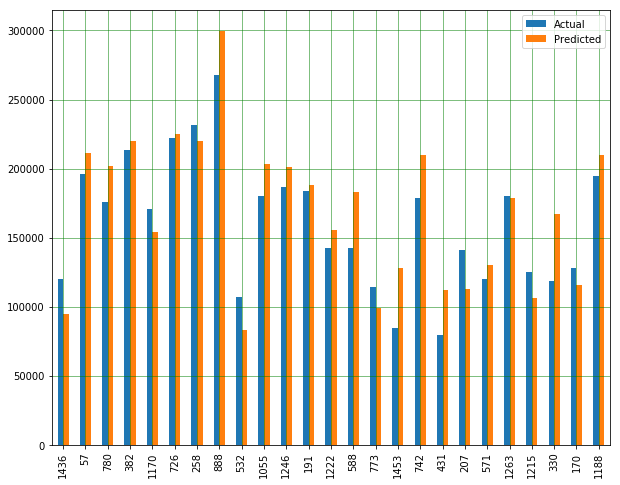

In [104]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [105]:
from sklearn import tree
clf=tree.DecisionTreeRegressor()
clf.fit(X_train,Y_train)
predictions1=clf.predict(X_test)
predictions1

array([115000., 183500., 207000., 189000., 140000., 187500., 192500.,
       253293., 109500., 171000., 155835., 174000., 159000., 190000.,
       110000., 118000., 207000., 115000., 135000., 133900., 177500.,
       125500., 127500., 153900., 180000., 129000.,  60000.,  84900.,
       169990., 144900., 143500., 192000., 236000.,  93000., 135960.,
        88000., 132500.,  82000., 225000., 139900., 314813., 179600.,
       124900., 125500., 162000.,  93000., 250000., 156000., 155000.,
        79500., 272000.,  86000., 290000., 311500., 188500.,  68400.,
       100000., 211000., 126175., 426000., 141000., 221500., 169900.,
       189000., 184100., 274300., 110000.,  95000., 201000., 155000.,
       201000., 223000., 167500., 133000., 149900., 159500., 140000.,
       263000., 217500., 221000., 148000., 212000., 160000., 154000.,
       348000.,  86000., 120000., 165400., 167000.,  99500., 141000.,
       170000., 190000., 160000., 263435.,  60000., 200000., 187000.,
       156000., 2267

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions1))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions1)))

Mean Absolute Error: 26824.085616438355
Mean Squared Error: 1575565680.6952055
Root Mean Squared Error: 39693.39593301643


In [158]:
df2=pd.DataFrame({'Actual':Y_test,'Predicted':predictions1})
df3=df2.head(5)
df3

,Actual,Predicted
1436,120500,115000.0
57,196500,183500.0
780,176000,207000.0
382,213500,189000.0
1170,171000,140000.0


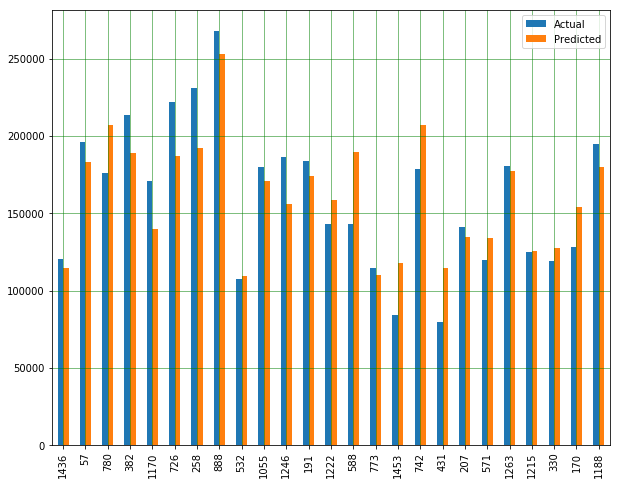

In [108]:
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [109]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(random_state=0)
reg.fit(X,Y)
#print(reg.feature_importances_)
predictions2=reg.predict(X_test)
predictions2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([116600.        , 191400.        , 176075.        , 205850.        ,
       146330.        , 210300.        , 236430.        , 287479.8       ,
       107740.        , 171950.        , 188674.        , 180265.        ,
       142390.        , 153870.        , 115150.        , 115380.        ,
       181913.4       ,  92774.7       , 139440.        , 124250.        ,
       187500.        , 120700.        , 126240.        , 136190.        ,
       192940.        , 137900.        ,  44591.1       , 102950.        ,
       190310.        , 146295.        , 142100.        , 206950.        ,
       236000.        ,  81080.        , 127930.        ,  86700.        ,
       139450.        , 100945.3       , 136790.        , 138950.        ,
       368455.6       , 206650.        , 121740.        ,  66850.        ,
       171120.        ,  53090.        , 254500.        , 148306.        ,
       145100.        , 108450.        , 211000.        , 107700.        ,
       319662.        , 2

In [110]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions2)))

Mean Absolute Error: 7575.839269406391
Mean Squared Error: 152909807.78868338
Root Mean Squared Error: 12365.670535344349


In [159]:
df4=pd.DataFrame({'Actual':Y_test,'Predicted':predictions2})
df5=df4.head(5)
df5

,Actual,Predicted
1436,120500,116600.0
57,196500,191400.0
780,176000,176075.0
382,213500,205850.0
1170,171000,146330.0


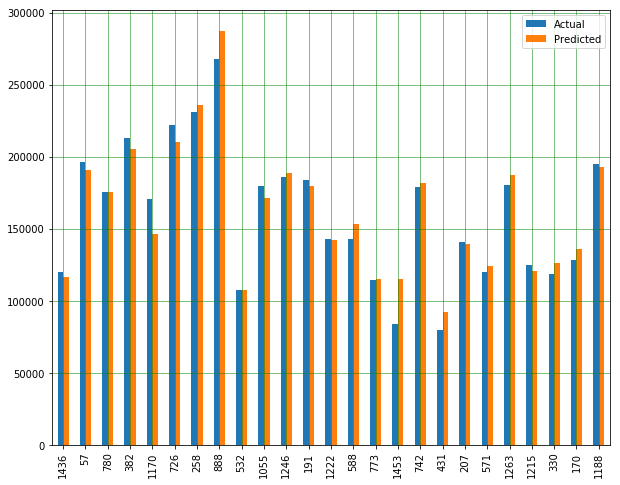

In [112]:
df5.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

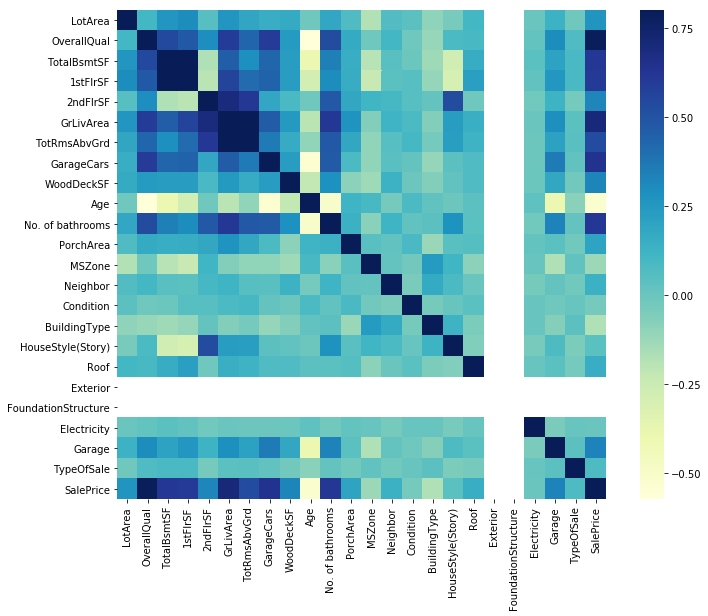

In [113]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="YlGnBu");

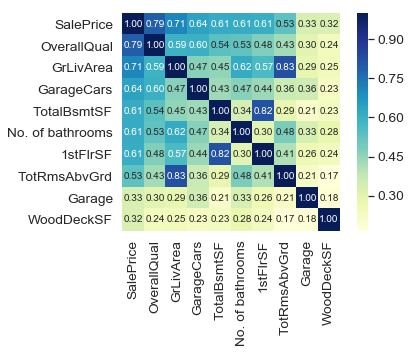

In [114]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="YlGnBu")
plt.show()


In [115]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,TotalBsmtSF
5,No. of bathrooms
6,1stFlrSF
7,TotRmsAbvGrd
8,Garage
9,WoodDeckSF


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

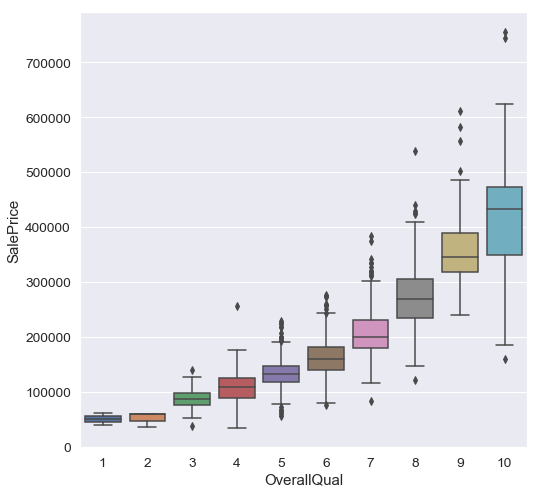

In [117]:
plt.figure(figsize=(8,8))
sns.boxplot(x=train['OverallQual'],y=train['SalePrice'])

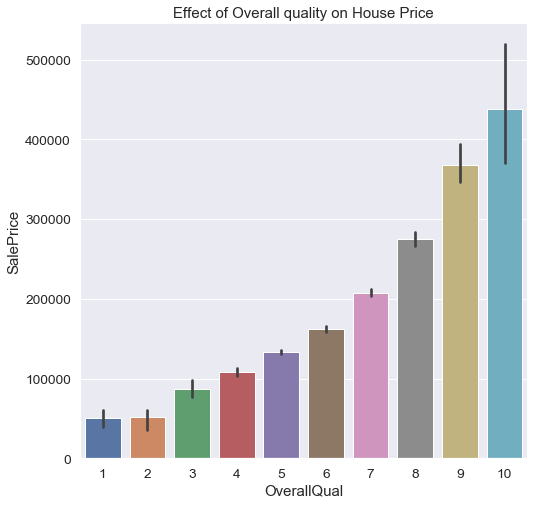

In [118]:
plt.figure(figsize=(8,8))
plt.title("Effect of Overall quality on House Price")
sns.barplot(x=train['OverallQual'],y=train['SalePrice'])

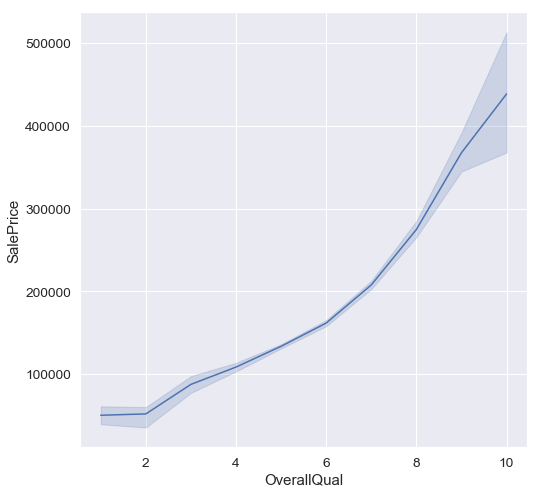

In [119]:
plt.figure(figsize=(8,8))
sns.lineplot(x=train['OverallQual'],y=train['SalePrice'])

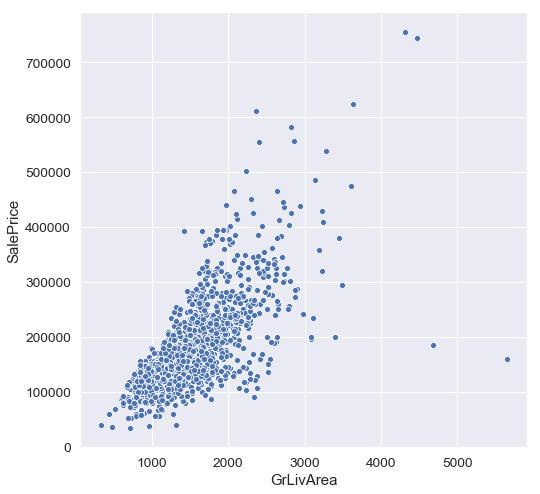

In [120]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train['GrLivArea'],y=train['SalePrice'])

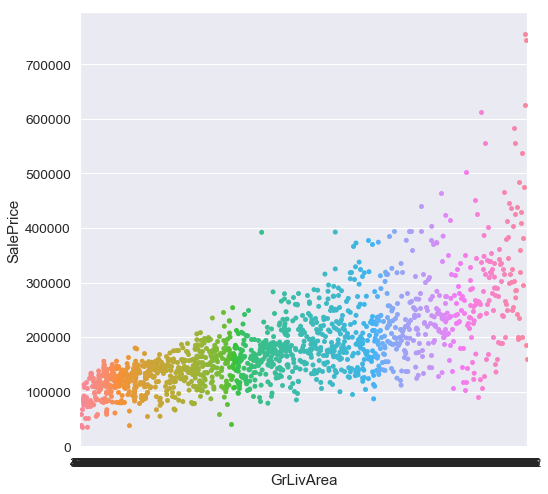

In [121]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['GrLivArea'],y=train['SalePrice'])

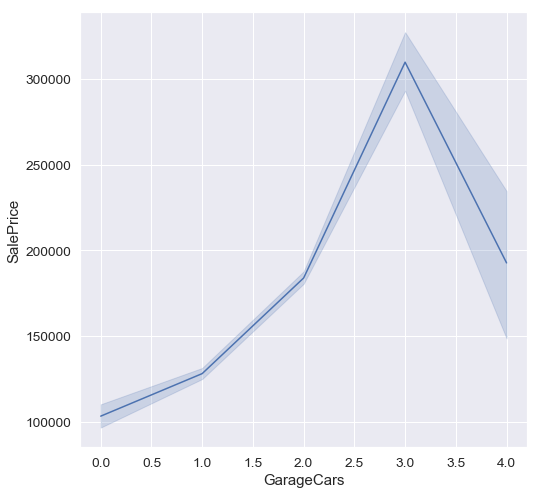

In [122]:
plt.figure(figsize=(8,8))
sns.lineplot(x=train['GarageCars'],y=train['SalePrice'])

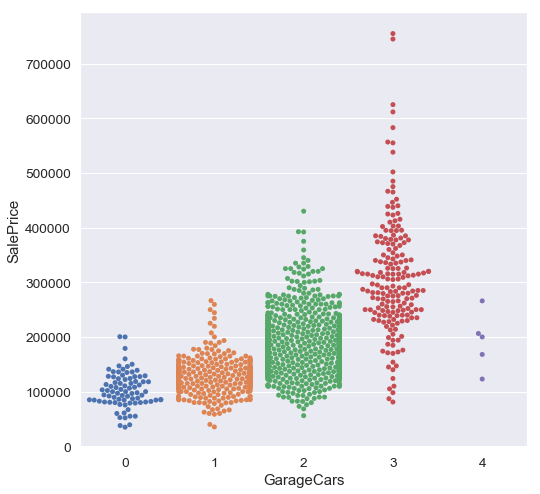

In [123]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['GarageCars'],y=train['SalePrice'])

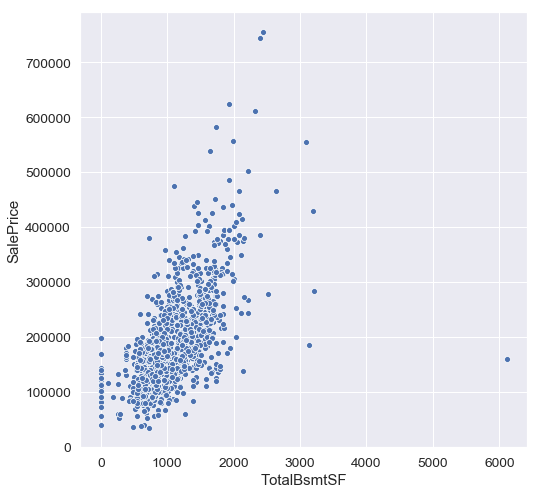

In [124]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train['TotalBsmtSF'],y=train['SalePrice'])

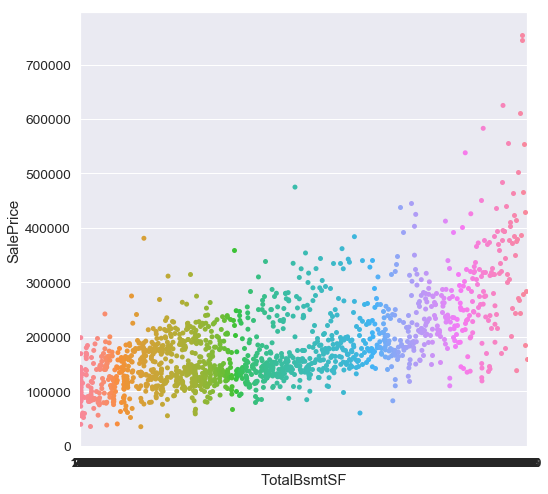

In [125]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['TotalBsmtSF'],y=train['SalePrice'])

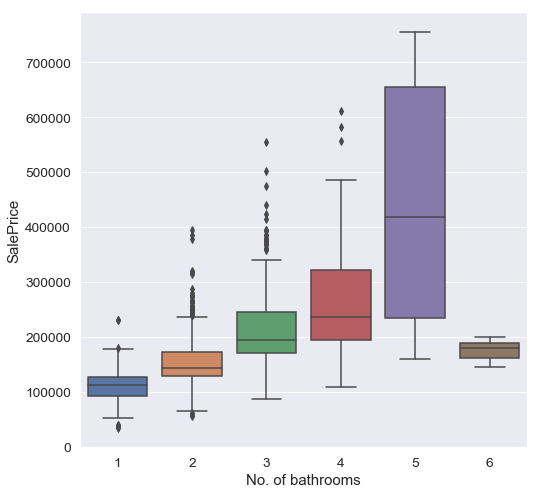

In [126]:
plt.figure(figsize=(8,8))
sns.boxplot(x=train['No. of bathrooms'],y=train['SalePrice'])

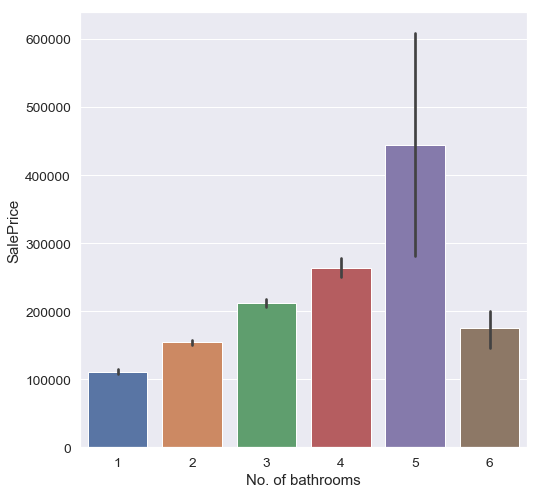

In [127]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['No. of bathrooms'],y=train['SalePrice'])

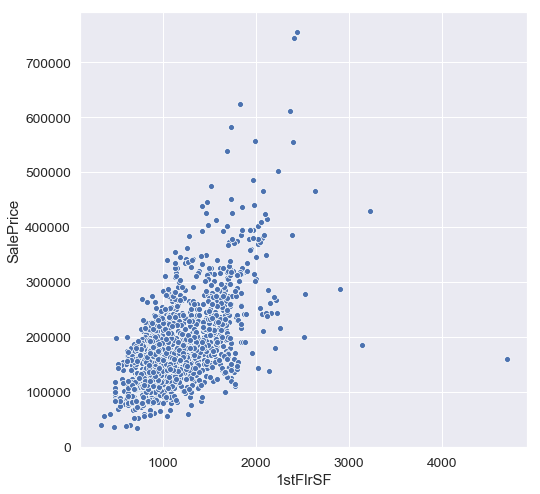

In [128]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=train['1stFlrSF'],y=train['SalePrice'])

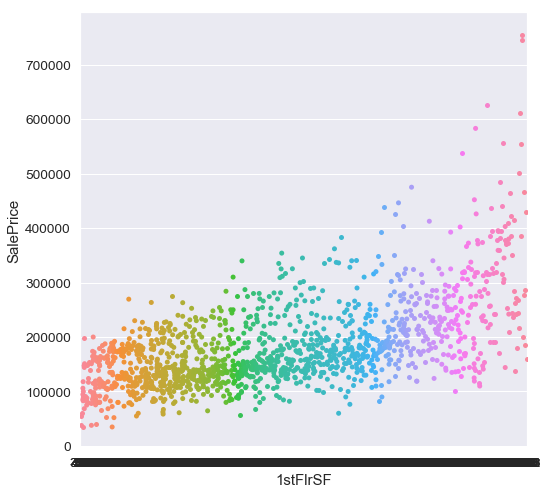

In [129]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['1stFlrSF'],y=train['SalePrice'])

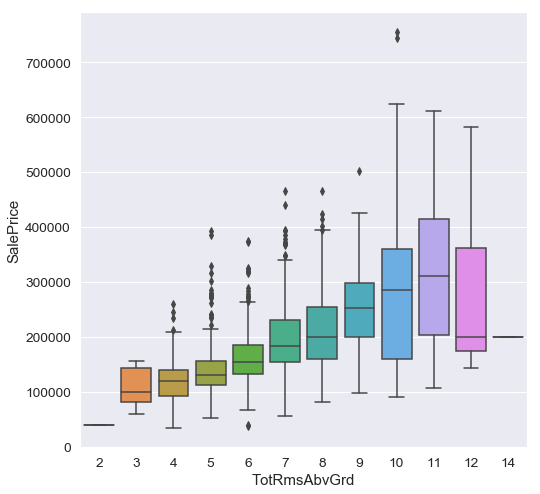

In [130]:
plt.figure(figsize=(8,8))
sns.boxplot(x=train['TotRmsAbvGrd'],y=train['SalePrice'])

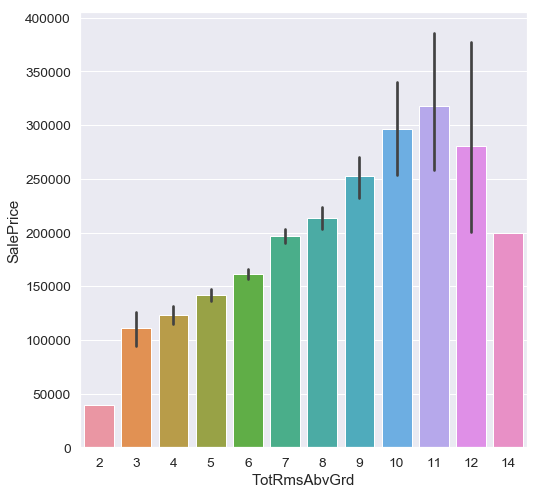

In [131]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['TotRmsAbvGrd'],y=train['SalePrice'])

In [132]:
def a(num):
    if num==0:
        return "No Garage"
    elif num==1:
        return "Attchd"
    elif num==2:
        return "BuiltIn"
    elif num==3:
        return "Basment"
    elif num==4:
        return "CarPort"
    elif num==5:
        return "2Types"
train["Garage"]=train["Garage"].apply(a)
train.head()

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,WoodDeckSF,Age,...,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure,Electricity,Garage,TypeOfSale,SalePrice
0,8450,7,856,856,854,1710,8,2,0,5,...,1,1,2.0,1,1,1,1.0,Attchd,1,208500
1,9600,6,1262,1262,0,1262,6,2,298,31,...,2,1,1.0,1,1,1,1.0,Attchd,1,181500
2,11250,7,920,920,866,1786,6,2,0,7,...,1,1,2.0,1,1,1,1.0,Attchd,1,223500
3,9550,7,756,961,756,1717,7,3,0,91,...,1,1,2.0,1,1,1,1.0,No Garage,1,140000
4,14260,8,1145,1145,1053,2198,9,3,192,8,...,1,1,2.0,1,1,1,1.0,Attchd,1,250000


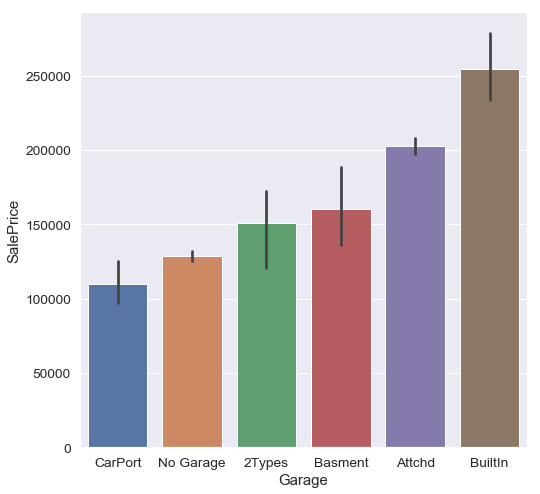

In [133]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['Garage'],y=train['SalePrice'],order=["CarPort","No Garage","2Types","Basment","Attchd","BuiltIn"])

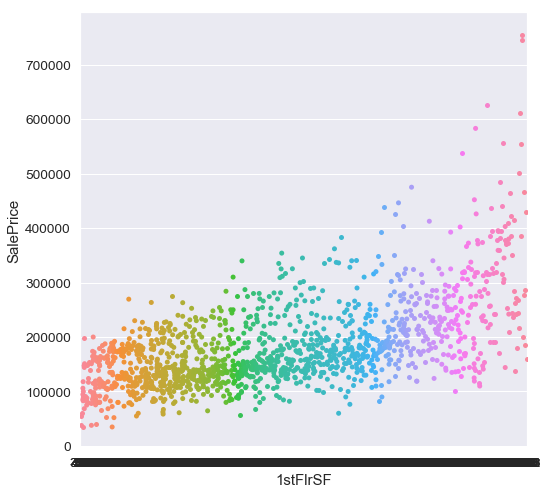

In [134]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['1stFlrSF'],y=train['SalePrice'])

In [135]:
train.columns

Index(['LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'Age',
       'No. of bathrooms', 'PorchArea', 'MSZone', 'Neighbor', 'Condition',
       'BuildingType', 'HouseStyle(Story)', 'Roof', 'Exterior',
       'FoundationStructure', 'Electricity', 'Garage', 'TypeOfSale',
       'SalePrice'],
      dtype='object')

In [136]:
def age(num):
    if num>0 and num<=10:
        return "<10"
    if num>10 and num<=20:
        return "10-20"
    if num>20 and num<=30:
        return "20-30"
    if num>30 and num<=40:
        return "30-40"
    if num>40 and num<=50:
        return "40-50"
    if num>50 and num<=60:
        return "50-60"
    if num>60 and num<=70:
        return "60-70"
    if num>70 and num<=80:
        return "70-80"
    if num>80 and num<=90:
        return "80-90"
    if num>90 and num<=100:
        return "90-100"
    else:
        return ">100"
    
train['Age']=train['Age'].apply(age)

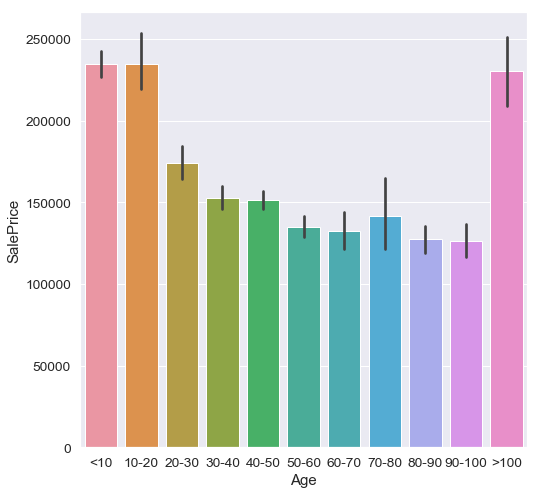

In [137]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['Age'],y=train['SalePrice'],order=["<10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100",">100"])

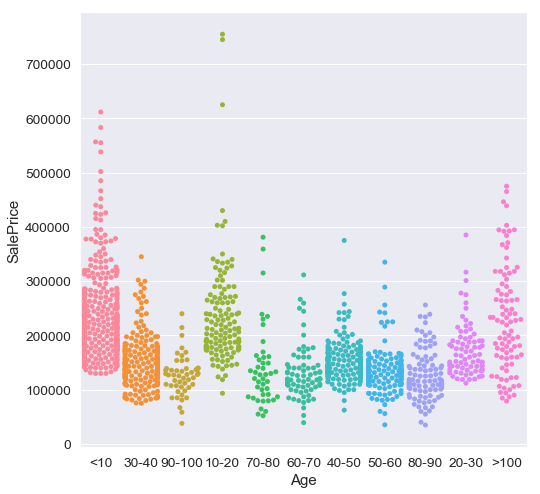

In [138]:
plt.figure(figsize=(8,8))
sns.swarmplot(x=train['Age'],y=train['SalePrice'])

In [139]:
train.columns

Index(['LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'Age',
       'No. of bathrooms', 'PorchArea', 'MSZone', 'Neighbor', 'Condition',
       'BuildingType', 'HouseStyle(Story)', 'Roof', 'Exterior',
       'FoundationStructure', 'Electricity', 'Garage', 'TypeOfSale',
       'SalePrice'],
      dtype='object')

In [140]:
def m(num):
    if num==1:
        return "1Fam"
    elif num==2:
        return "TwnhsE"
    elif num==3:
        return "Duplex"
    elif num==4:
        return "Twnhs"
    elif num==5:
        return "2fmCon"
train["BuildingType"]=train["BuildingType"].apply(m)


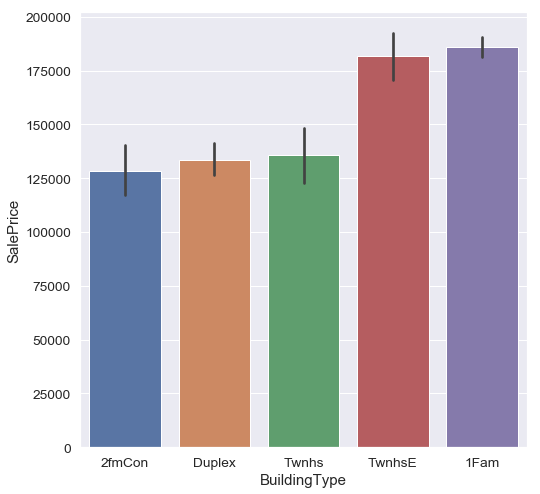

In [141]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['BuildingType'],y=train['SalePrice'],order=["2fmCon","Duplex","Twnhs","TwnhsE","1Fam"])

In [142]:
def x(num):
    if num==0:
        return
    elif num==1:
        return "1Story"
    elif num==2:
        return "2Story"
    elif num ==1.5:
        return "1.5 Fin/Unf"
    elif num==3:
        return "SLvL"
    elif num==4:
        return "SFoyer"
    else:
        return "2.5 Fin/Unf"
train["HouseStyle(Story)"]=train["HouseStyle(Story)"].apply(x)
train.head()

,LotArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,WoodDeckSF,Age,...,Condition,BuildingType,HouseStyle(Story),Roof,Exterior,FoundationStructure,Electricity,Garage,TypeOfSale,SalePrice
0,8450,7,856,856,854,1710,8,2,0,<10,...,1,1Fam,2Story,1,1,1,1.0,Attchd,1,208500
1,9600,6,1262,1262,0,1262,6,2,298,30-40,...,2,1Fam,1Story,1,1,1,1.0,Attchd,1,181500
2,11250,7,920,920,866,1786,6,2,0,<10,...,1,1Fam,2Story,1,1,1,1.0,Attchd,1,223500
3,9550,7,756,961,756,1717,7,3,0,90-100,...,1,1Fam,2Story,1,1,1,1.0,No Garage,1,140000
4,14260,8,1145,1145,1053,2198,9,3,192,<10,...,1,1Fam,2Story,1,1,1,1.0,Attchd,1,250000


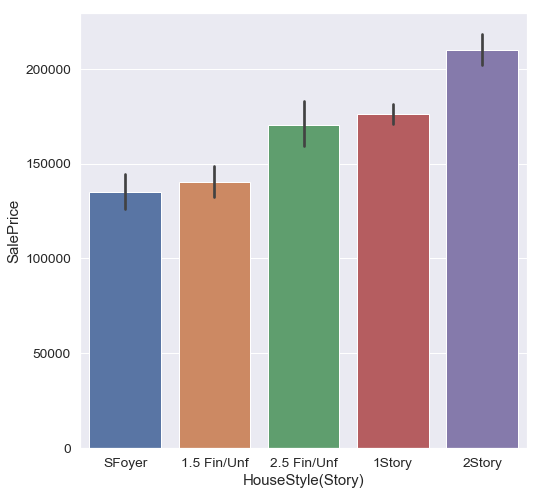

In [143]:
plt.figure(figsize=(8,8))
sns.barplot(x=train['HouseStyle(Story)'],y=train['SalePrice'],order=["SFoyer","1.5 Fin/Unf","2.5 Fin/Unf","1Story","2Story"])

In [144]:
train.columns

Index(['LotArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'WoodDeckSF', 'Age',
       'No. of bathrooms', 'PorchArea', 'MSZone', 'Neighbor', 'Condition',
       'BuildingType', 'HouseStyle(Story)', 'Roof', 'Exterior',
       'FoundationStructure', 'Electricity', 'Garage', 'TypeOfSale',
       'SalePrice'],
      dtype='object')

In [145]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [146]:
def overallqual():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(16,7), dpi=100)
    ax1 = figure1.add_subplot(121)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of Overall quality on House Price")
    sns.barplot(x=train['OverallQual'],y=train['SalePrice'],ax=ax1)
    
    ax2 = figure1.add_subplot(122)
    ax2.set_title("Effect of Overall quality on House Price")
    sns.lineplot(x=train['OverallQual'],y=train['SalePrice'],ax=ax2)
    root.mainloop()
overallqual()

In [147]:
def garagecars():
    root= tk.Tk() 
    
    figure1 = plt.Figure(figsize=(16,8), dpi=100)
    ax1 = figure1.add_subplot(221)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of No. of cars in garage on House Price")
    sns.barplot(x=train['GarageCars'],y=train['SalePrice'],ax=ax1)
    
    ax2 = figure1.add_subplot(122)
    ax2.set_title("Effect of No. of cars in garage on House Price")
    sns.lineplot(x=train['GarageCars'],y=train['SalePrice'],ax=ax2)
    
    ax3 = figure1.add_subplot(223)
    sns.swarmplot(x=train['GarageCars'],y=train['SalePrice'],ax=ax3)
    
    root.mainloop()
garagecars()

In [148]:
def bathrooms():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(16,7), dpi=100)
    ax1 = figure1.add_subplot(121)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of No. of bathrooms on House Price")
    sns.barplot(x=train['No. of bathrooms'],y=train['SalePrice'],ax=ax1)
    
    ax2 = figure1.add_subplot(122)
    ax2.set_title("Effect of No. of bathrooms on House Price")
    sns.lineplot(x=train['No. of bathrooms'],y=train['SalePrice'],ax=ax2)
    
    root.mainloop()
bathrooms()

In [149]:
def rooms():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(16,7), dpi=100)
    ax1 = figure1.add_subplot(121)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of Total rooms above ground on House Price")
    sns.boxplot(x=train['TotRmsAbvGrd'],y=train['SalePrice'],ax=ax1)
    
    ax2 = figure1.add_subplot(122)
    ax2.set_title("Effect of Total rooms above ground on House Price")
    sns.lineplot(x=train['TotRmsAbvGrd'],y=train['SalePrice'],ax=ax2)
    
    root.mainloop()
rooms()

In [150]:
def garage():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(12,6), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of Type of garage on House Price")
    sns.barplot(x=train['Garage'],y=train['SalePrice'],order=["CarPort","No Garage","2Types","Basment","Attchd","BuiltIn"],ax=ax1)
    
    root.mainloop()
garage()

In [151]:
def age():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(16,7), dpi=100)
    ax1 = figure1.add_subplot(121)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of Age of house in years on House Price")
    sns.barplot(x=train['Age'],y=train['SalePrice'],order=["<10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100",">100"],ax=ax1)
    
    ax2 = figure1.add_subplot(122)
    ax2.set_title("Effect of Age of house in years on House Price")
    sns.lineplot(x=train['Age'],y=train['SalePrice'],ax=ax2)
    
    root.mainloop()
age()

In [152]:
def building():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(12,6), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of Building type on House Price")
    sns.barplot(x=train['BuildingType'],y=train['SalePrice'],order=["2fmCon","Duplex","Twnhs","TwnhsE","1Fam"],ax=ax1)
    
    root.mainloop()
building()

In [153]:
def house():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(12,6), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of House style(Story) on House Price")
    sns.barplot(x=train['HouseStyle(Story)'],y=train['SalePrice'],order=["SFoyer","1.5 Fin/Unf","2.5 Fin/Unf","1Story","2Story"],ax=ax1)
    
    root.mainloop()
house()

In [154]:
def grdarea():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(13,7), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of Ground living area on House Price")
    sns.swarmplot(x=train['GrLivArea'],y=train['SalePrice'],ax=ax1)
    
    root.mainloop()
grdarea()

In [155]:
def bsmtarea():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(13,7), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of Total Basement Area in square feet on House Price")
    sns.swarmplot(x=train['TotalBsmtSF'],y=train['SalePrice'],ax=ax1)
    
    root.mainloop()
bsmtarea()

In [156]:
def frstarea():
    root= tk.Tk() 
    figure1 = plt.Figure(figsize=(13,7), dpi=100)
    ax1 = figure1.add_subplot(111)
    bar1 = FigureCanvasTkAgg(figure1, root)
    bar1.get_tk_widget().pack()
    ax1.set_title("Effect of First floor Area in square feet on House Price")
    sns.swarmplot(x=train['1stFlrSF'],y=train['SalePrice'],ax=ax1)
    
    root.mainloop()
frstarea()